In [11]:
from PIL import Image
import os
import pandas as pd
from IPython.display import Image as IPImage
from IPython.display import HTML

def create_thumbnail(image_path, size=(100, 100)):
    with Image.open(image_path) as img:
        img.thumbnail(size)
        return img

def get_image_info_with_thumbnails(folder_path):
    image_data = []
    thumbnails = []
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            with Image.open(file_path) as img:
                file_format = img.format
                color_mode = img.mode
                width, height = img.size
                channels = len(img.getbands())
                file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                
               
                thumbnail = create_thumbnail(file_path)
                thumbnail_path = f"thumbnails/{file_name}"
                os.makedirs(os.path.dirname(thumbnail_path), exist_ok=True)
                thumbnail.save(thumbnail_path)
                
        
                image_data.append({
                    'File Name': file_name,
                    'Color Model': color_mode,
                    'Format': file_format,
                    'Channels': channels,
                    'Size (MB)': file_size,
                    'Width': width,
                    'Height': height,
                    'Full Path': file_path
                })
                thumbnails.append(thumbnail_path)
                
        except Exception as e:
            continue
    
    
    df = pd.DataFrame(image_data)
    df['Thumbnail'] = [f'<img src="{path}" style="width:100px;height:100px;"/>' for path in thumbnails]
    
    return df


folder_path = 'c:/Users/Xena/Screenshots'  
df = get_image_info_with_thumbnails(folder_path)
HTML(df.to_html(escape=False))


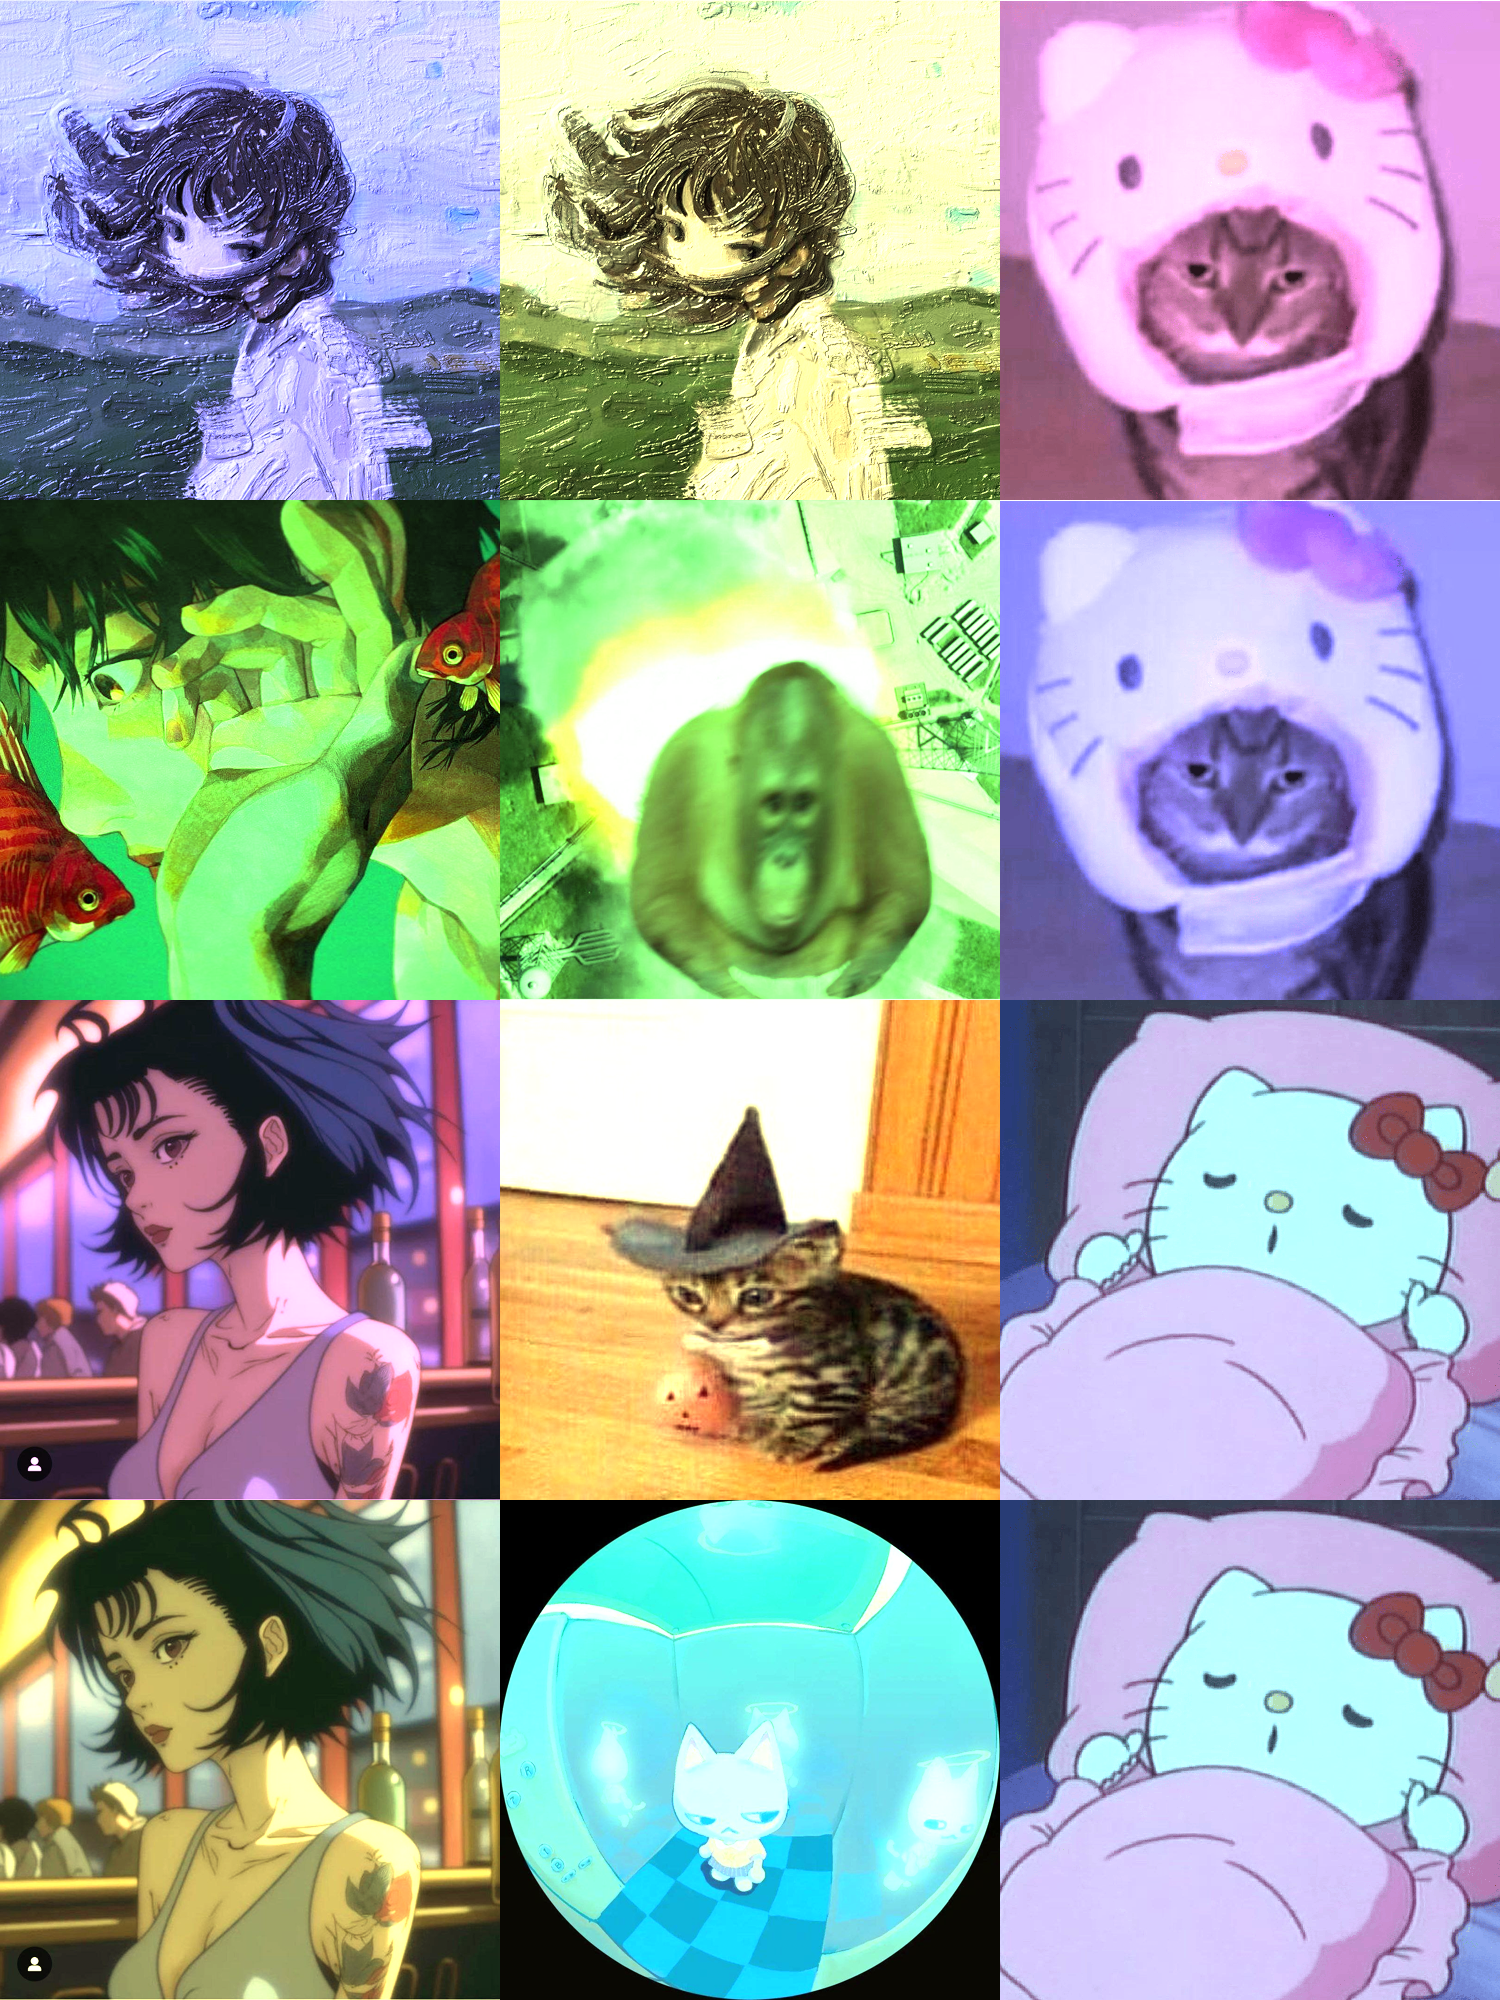

In [18]:
from PIL import Image, ImageEnhance
import os
import random
from IPython.display import display

def crop_to_square(image):
    width, height = image.size
    min_side = min(width, height)
    left = (width - min_side) / 2
    top = (height - min_side) / 2
    right = (width + min_side) / 2
    bottom = (height + min_side) / 2
    return image.crop((left, top, right, bottom))

def apply_random_filter(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
        
    filters = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan']
    filter_choice = random.choice(filters)
    
    if filter_choice == 'red':
        return ImageEnhance.Color(image).enhance(2)
    elif filter_choice == 'green':
        r, g, b = image.split()
        return Image.merge("RGB", (r, g.point(lambda x: x * 2), b))
    elif filter_choice == 'blue':
        r, g, b = image.split()
        return Image.merge("RGB", (r, g, b.point(lambda x: x * 2)))
    elif filter_choice == 'yellow':
        r, g, b = image.split()
        return Image.merge("RGB", (r.point(lambda x: x * 1.5), g.point(lambda x: x * 1.5), b))
    elif filter_choice == 'purple':
        r, g, b = image.split()
        return Image.merge("RGB", (r.point(lambda x: x * 1.5), g, b.point(lambda x: x * 1.5)))
    elif filter_choice == 'cyan':
        r, g, b = image.split()
        return Image.merge("RGB", (r, g.point(lambda x: x * 1.5), b.point(lambda x: x * 1.5)))

def create_poster(folder_path, output_image, images_per_row, images_per_column):
    image_size = 500  
    poster_width = images_per_row * image_size
    poster_height = images_per_column * image_size
    
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    if not image_files:
        raise ValueError("No image files found in the folder.")
    
    poster = Image.new('RGB', (poster_width, poster_height))
    
    for row in range(images_per_column):
        for col in range(images_per_row):
            random_image_path = random.choice(image_files)
            with Image.open(random_image_path) as img:
                img = crop_to_square(img).resize((image_size, image_size))
                img = apply_random_filter(img)
                poster.paste(img, (col * image_size, row * image_size))
    
    poster.save(output_image)
    display(poster)  

# Example usage:
folder_path = 'c:/Users/Xena/Screenshots'  
output_image = 'image1.png'  
create_poster(folder_path, output_image, 3, 4)  
